In [115]:
import torchxrayvision as xrv

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
from mpl_toolkits.axes_grid1 import ImageGrid


In [142]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image, cmap='bone')
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    

In [26]:
d_covid19 = xrv.datasets.COVID19_Dataset(
    '/Users/aniket/Google Drive/Projects/covid-research/data/covid-chestxray-dataset/images',
    '/Users/aniket/Google Drive/Projects/covid-research/data/covid-chestxray-dataset/metadata.csv',
)

In [38]:
d_covid19.totals

{'Aspergillosis': {0.0: 534, 1.0: 1},
 'Aspiration': {0.0: 534, 1.0: 1},
 'Bacterial': {0.0: 487, 1.0: 48},
 'COVID-19': {0.0: 193, 1.0: 342},
 'Chlamydophila': {0.0: 534, 1.0: 1},
 'Fungal': {0.0: 512, 1.0: 23},
 'H1N1': {0.0: 534, 1.0: 1},
 'Herpes ': {0.0: 532, 1.0: 3},
 'Influenza': {0.0: 531, 1.0: 4},
 'Klebsiella': {0.0: 526, 1.0: 9},
 'Legionella': {0.0: 526, 1.0: 9},
 'Lipoid': {0.0: 527, 1.0: 8},
 'MERS-CoV': {0.0: 527, 1.0: 8},
 'MRSA': {0.0: 534, 1.0: 1},
 'Mycoplasma': {0.0: 530, 1.0: 5},
 'No Finding': {0.0: 520, 1.0: 15},
 'Nocardia': {0.0: 531, 1.0: 4},
 'Pneumocystis': {0.0: 513, 1.0: 22},
 'Pneumonia': {0.0: 26, 1.0: 509},
 'SARS': {0.0: 519, 1.0: 16},
 'Staphylococcus': {0.0: 534, 1.0: 1},
 'Streptococcus': {0.0: 518, 1.0: 17},
 'Tuberculosis': {0.0: 524, 1.0: 11},
 'Varicella': {0.0: 530, 1.0: 5},
 'Viral': {0.0: 157, 1.0: 378}}


<bound method Dataset.totals of COVID19_Dataset num_samples=535 views=['PA', 'AP']>

In [125]:
images = []
labels = []
for j in range(4):
    i = random.randint(0, len(d_covid19))

    img = d_covid19[i]['img']
    # print(img.shape)
    img = img.transpose(1, 2, 0)
    # print(img.shape)
    label = d_covid19[i]['lab'][3]
    images.append(img)
    labels.append(label)
#     plt.imshow(img, cmap='bone')

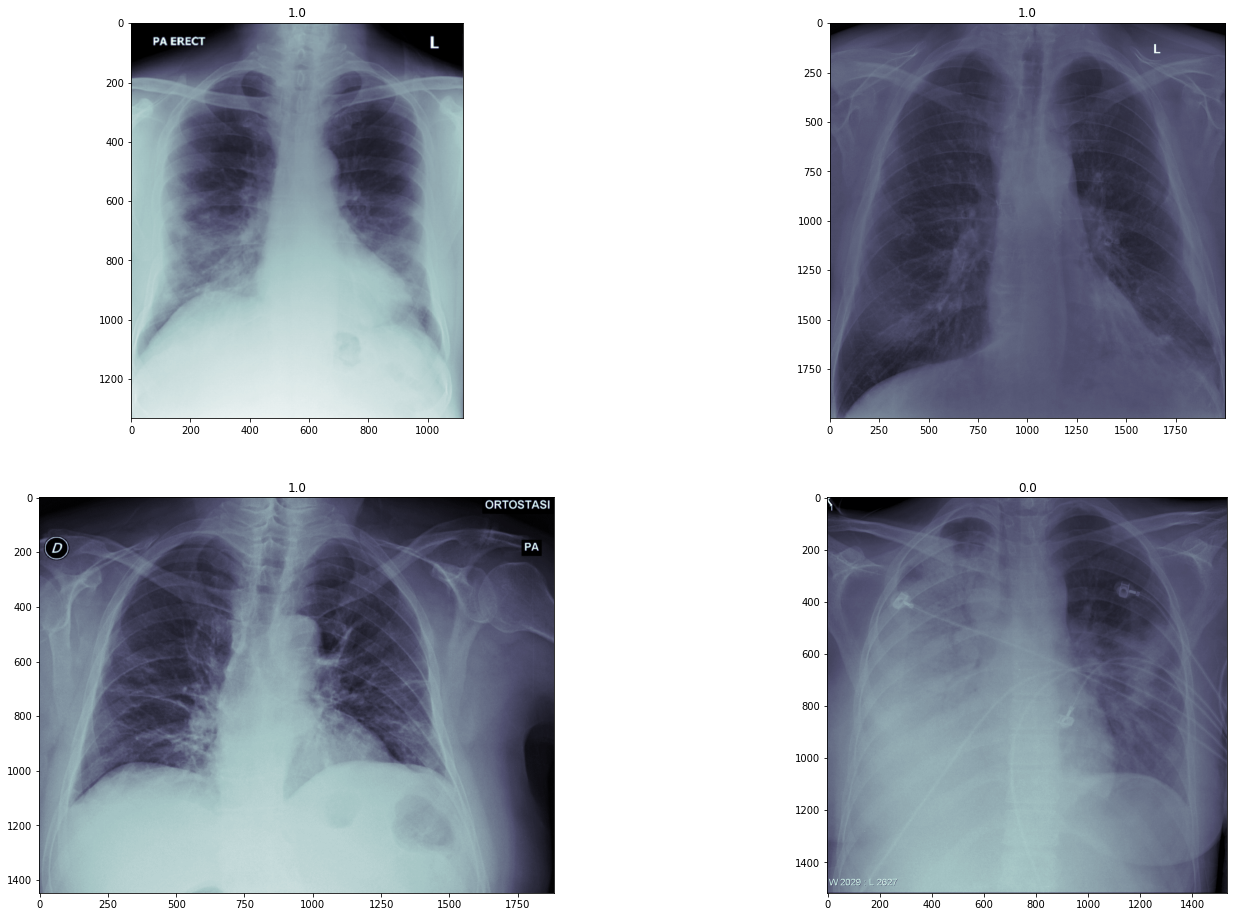

In [143]:
show_images(images, cols=2, titles=labels)